In [ ]:
import numpy as np
import pandas as pd
from numpy import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
cloud= pd.read_excel(r'C:\Users\id\Downloads\cloud gaming dataset.xlsx',usecols=[2,4,5,6,7,8])

In [ ]:
cloud.head()

,GameType,Framerate,Bitrate,QoE,Fluidity,Graphics
0,0,60,10,4,5,4
1,2,60,10,4,4,5
2,0,45,10,4,4,4
3,2,45,10,4,4,4
4,0,35,10,4,4,4


In [ ]:
y = pd.DataFrame(cloud['QoE'])

In [ ]:
x=pd.DataFrame()
x['GameType'],x['Framerate'],x['Bitrate'],x['Fluidity'],x['Graphics']=cloud['GameType'],cloud['Framerate'],cloud['Bitrate'],cloud['Fluidity'],cloud['Graphics']

In [ ]:
y.tail()

,QoE
1915,3
1916,3
1917,4
1918,4
1919,3


In [ ]:
x.head()

,GameType,Framerate,Bitrate,Fluidity,Graphics
0,0,60,10,5,4
1,2,60,10,4,5
2,0,45,10,4,4
3,2,45,10,4,4
4,0,35,10,4,4


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train.head()

,GameType,Framerate,Bitrate,Fluidity,Graphics
1025,2,60,3,5,5
775,2,25,10,5,5
596,0,35,3,4,4
563,2,45,5,3,3
1738,0,45,5,4,4


In [ ]:
y_train.head()

,QoE
1025,4
775,5
596,4
563,4
1738,4


In [ ]:
poly=PolynomialFeatures(degree=3)

In [ ]:
x_train_poly, x_test_poly= poly.fit_transform(x_train), poly.fit_transform(x_test)

In [ ]:
x_train_poly

array([[ 1.,  2., 60., ..., 25., 25., 25.],
       [ 1.,  2., 25., ..., 25., 25., 25.],
       [ 1.,  0., 35., ..., 16., 16., 16.],
       ...,
       [ 1.,  1., 35., ..., 16., 16., 16.],
       [ 1.,  2., 25., ..., 16., 16., 16.],
       [ 1.,  0., 35., ...,  9., 12., 16.]])

In [ ]:
model=linear_model.LinearRegression()
model=model.fit(x_train_poly, y_train)

In [ ]:
coefficient= model.coef_
coefficient

array([[ 0.00000000e+00,  1.42118300e-01,  5.04351021e-03,
         4.05098521e-02,  2.53460456e-01,  6.05057552e-01,
         2.66652699e-02,  8.98350347e-05, -3.66190078e-03,
        -1.32460773e-02, -1.61950310e-02, -6.32178676e-05,
         2.60616386e-04, -4.27118384e-04,  8.67754976e-05,
        -4.58583138e-03, -7.09627587e-03,  1.10728465e-02,
        -9.38182102e-03,  9.33671880e-02, -8.50687245e-02]])

In [ ]:
intercept= model.intercept_
intercept

array([0.39632183])

In [ ]:
prediction= model.predict(x_test_poly)

In [ ]:
prediction

array([[4.16126318],
       [2.76281201],
       [2.66356552],
       [3.5393603 ],
       [4.15538189],
       [4.03633474],
       [3.73638838],
       [3.39003938],
       [4.92575644],
       [4.9441    ],
       [4.05298075],
       [4.58067398],
       [4.06835217],
       [3.18249884],
       [4.07753586],
       [3.5598207 ],
       [4.91635967],
       [4.18155395],
       [3.198211  ],
       [2.00233523],
       [4.63504762],
       [4.96744558],
       [3.55187596],
       [4.01312459],
       [4.01312459],
       [4.15538189],
       [3.00342454],
       [3.23048936],
       [2.30224658],
       [3.62503552],
       [3.32991248],
       [4.51425513],
       [2.6812409 ],
       [4.44398963],
       [2.73166647],
       [4.58962931],
       [2.67281035],
       [4.18885593],
       [4.99810173],
       [4.6392823 ],
       [3.21371201],
       [4.97049388],
       [3.04602655],
       [4.44398963],
       [4.92681422],
       [3.198211  ],
       [3.13100822],
       [3.241

In [ ]:
y_pred= pd.DataFrame(prediction)
y_pred.head()

,0
0,4.161263
1,2.762812
2,2.663566
3,3.539360
4,4.155382


In [ ]:
poly_reg=pd.DataFrame()
poly_reg=x_test

In [ ]:
poly_reg['Actual QoE']= y_test['QoE']

C:\Users\id\AppData\Local\Temp/ipykernel_16440/4093376327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly_reg['Actual QoE']= y_test['QoE']


In [ ]:
poly_reg.head()

,GameType,Framerate,Bitrate,Fluidity,Graphics,Actual QoE
361,2,60,10,4,4,4
1550,0,25,5,2,3,2
1246,0,25,3,3,2,4
1631,1,25,3,3,4,3
427,2,45,3,4,4,4


In [ ]:
poly_reg.reset_index(inplace=True)

In [ ]:
poly_reg.drop("index", axis=1, inplace=True)

C:\Users\id\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
poly_reg['Predicte QoE']= y_pred[0]

C:\Users\id\AppData\Local\Temp/ipykernel_16440/3533346203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly_reg['Predicte QoE']= y_pred[0]


In [ ]:
poly_reg.head()

,GameType,Framerate,Bitrate,Fluidity,Graphics,Actual QoE,Predicte QoE,Error
0,2,60,10,4,4,4,4.161263,-0.161263
1,0,25,5,2,3,2,2.762812,-0.762812
2,0,25,3,3,2,4,2.663566,1.336434
3,1,25,3,3,4,3,3.539360,-0.539360
4,2,45,3,4,4,4,4.155382,-0.155382


In [ ]:
poly_reg['Error']= poly_reg['Actual QoE']- poly_reg['Predicte QoE']

C:\Users\id\AppData\Local\Temp/ipykernel_16440/2903121846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly_reg['Error']= poly_reg['Actual QoE']- poly_reg['Predicte QoE']


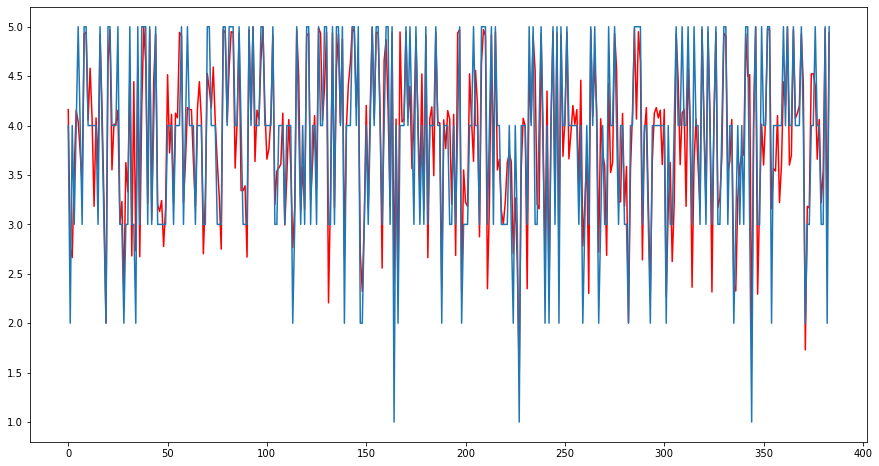

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(poly_reg['Predicte QoE'], 'r')
plt.plot(poly_reg['Actual QoE'])
plt.show()

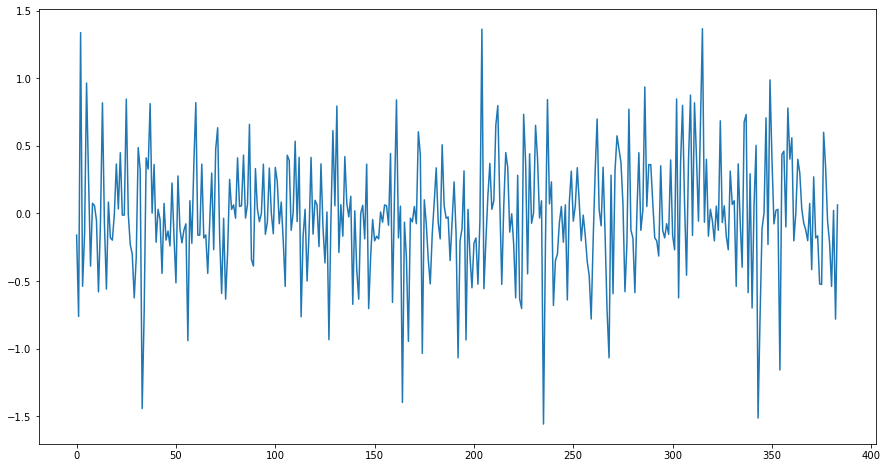

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(poly_reg['Error'])

In [ ]:
y_test.reset_index(inplace=True)

In [ ]:
y_test.head()

,index,QoE
0,361,4
1,1550,2
2,1246,4
3,1631,3
4,427,4


In [ ]:
y_test.drop("index", axis=1, inplace=True)

C:\Users\id\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
math.sqrt(mean_squared_error(y_test,y_pred))

0.4385405291743195

In [ ]:
r2_score(y_test,y_pred)

0.7606460816943041